In [1]:
import f3dasm
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2022-10-04 15:39:54.112288: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
name = "0006"

In [3]:
x = f3dasm.read_pickle(name)

In [4]:
[xo.seeds for xo in x]

[[63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106],
 [63102, 63103, 63104, 63105, 63106]]

In [5]:
def calc_mean_std(results):
    mean_y = pd.concat([d.get_output_data().cummin() for d in results], axis=1).mean(axis=1)
    std_y = pd.concat([d.get_output_data().cummin() for d in results], axis=1).std(axis=1)
    return mean_y, std_y

In [6]:
def plot_results(results, ax):
    mean_y, std_y = calc_mean_std(results.data)

    ax.plot(mean_y, label=f"optimizer={results.optimizer}")

    ax.fill_between(np.arange(len(mean_y)), mean_y-1.96*std_y, mean_y+1.96*std_y, alpha=.1)

    return ax

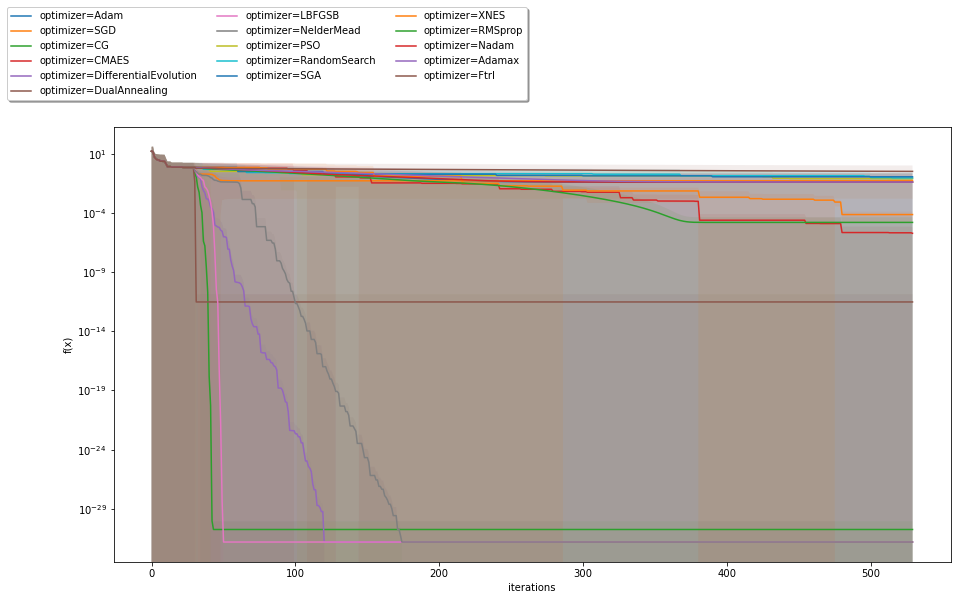

In [7]:
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('f(x)')
ax.set_yscale('log')

for index, res in enumerate(x):
    ax = plot_results(res, ax)

ax.legend(loc='lower right', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

DualAnnealing


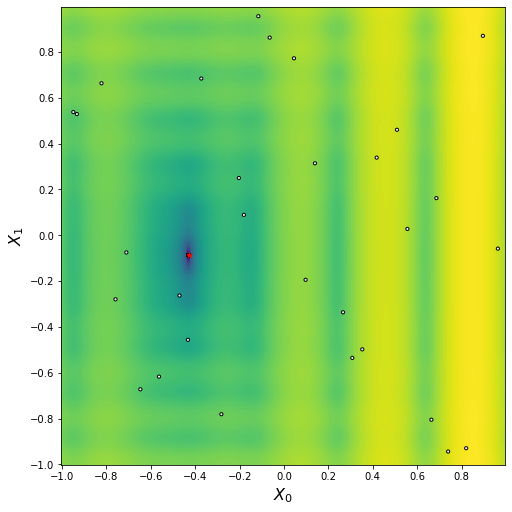

In [8]:
i = 5

x[i].function.plot_data(data=x[i].data[0],domain=np.tile([-1.,1.], (2,1)))
print(x[i].optimizer)

CMAES


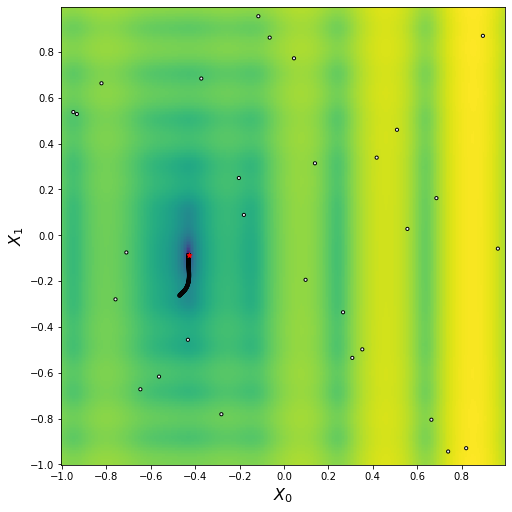

In [9]:
i = 3

x[i].function.plot_data(data=x[0].data[0],domain=np.tile([-1.,1.], (2,1)))
print(x[i].optimizer)

In [10]:
x[0].data[0].data

input                  output
           x0        x1             y
0   -0.759000 -0.279917  7.989442e+00
1   -0.563035 -0.617193  4.015111e+00
2    0.307816 -0.535436  1.340662e+01
3    0.509115  0.459996  5.086457e+01
4    0.820834 -0.929556  1.106224e+02
..        ...       ...           ...
525 -0.429087 -0.086918  2.955569e-08
526 -0.429087 -0.086916  2.824484e-08
527 -0.429087 -0.086915  2.699432e-08
528 -0.429087 -0.086913  2.579604e-08
529 -0.429087 -0.086912  2.464835e-08

[530 rows x 3 columns]